In [ ]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 32.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem.rdmolops import GetAdjacencyMatrix
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import GetMACCSKeysFingerprint
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from tqdm import tqdm
import pickle
# Pytorch
import torch
from torch.nn import Linear, MSELoss
import torch.nn.functional as F
from torch.utils.data import DataLoader

In [ ]:
new_train = pd.read_csv('/content/drive/MyDrive/Machine_Learn/New_train.csv')
new_train

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.68070
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.72930
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.29702
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,-2.21310
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.80710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.09880
10739,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.69070
10740,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.33372
10741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.19722


In [ ]:
new_test = pd.read_csv('/content/drive/MyDrive/Machine_Learn/New_test.csv')
new_test = new_test.drop('Unnamed: 0', axis=1)
new_test

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.45670
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.89700
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.77370
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,3.45200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.12810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,3.37280
1149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.71782
1150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.47080
1151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.45560


In [ ]:
new_test_scaf = pd.read_csv('/content/drive/MyDrive/Machine_Learn/New_test_scaf.csv')
new_test_scaf = new_test_scaf.drop('Unnamed: 0', axis=1)
new_test_scaf

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,2.92500
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.83970
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.10562
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.56980
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.58012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.79260
1100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,3.12762
1101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.21700
1102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,2.54850


In [ ]:
def get_loss(X, y, weights):
    m = len(y)
    y_pred = X.dot(weights)
    return 1.0 / (2.0 * m) * np.sum((y_pred - y)**2)

In [ ]:
# Преобразовать DataFrame в массив numpy
new_train_array = new_train.values
new_test_array = new_test.values
new_test_scaf_array = new_test_scaf.values

In [ ]:
type(new_train)
m_train = new_train.shape[0]
X_train = np.append(np.ones((m_train, 1)), new_train_array[:, :167].reshape(m_train, 167), axis=1)
y_train = new_train_array[:,-1].reshape(m_train, 1)
weights_train = np.zeros((X_train.shape[1], 1))
print( 'лось для тренировачного', get_loss(X_train, y_train, weights_train))

# data = df.values
# m = len(data[:,-1])
# X = df.iloc[:, 2:].values
# y = df['logp'].values
# y = y[:, np.newaxis]
type(new_test)
m_test = new_test.shape[0]
X_test = np.append(np.ones((m_test, 1)), new_test_array[:, :167].reshape(m_test, 167), axis=1)
y_test = new_test_array[:,-1].reshape(m_test, 1)
# weights_test = np.zeros((X_test.shape[1], 1))
# print( 'лось для тестирования', get_loss(X_test, y_test, weights_test))
type(new_test_scaf)
m_test_scaf = new_test_scaf.shape[0]
X_test_scaf = np.append(np.ones((m_test_scaf, 1)), new_test_scaf_array[:, :167].reshape(m_test_scaf, 167), axis=1)
y_test_scaf = new_test_scaf_array[:,-1].reshape(m_test_scaf, 1)
# # Adding new columns from ones for bias
# X = np.hstack([np.ones((X.shape[0], 1)), X])


лось для тренировачного 3.843510953077171


In [ ]:
def gradient_descent(X_train, y_train, X_test, y_test, X_test_scaf, y_test_scaf, weights_train, lr, max_iters):
    m_train = len(y_train)

    train_losses = []
    test_losses = []
    test_losses_scaf = []

    for i in tqdm(range(max_iters)):
        y_pred_train = X_train.dot(weights_train)
        gradient_train = 1.0 / m_train * np.dot(X_train.transpose(), y_pred_train - y_train)
        weights_train -= lr * gradient_train

        train_losses.append(get_loss(X_train, y_train, weights_train))
        test_losses.append(get_loss(X_test, y_test, weights_train))
        test_losses_scaf.append(get_loss(X_test_scaf, y_test_scaf, weights_train))

    plt.plot(train_losses, label='Train')
    plt.plot(test_losses, label='Test')
    plt.plot(test_losses_scaf, label='scaf')
    plt.legend()
    plt.xlabel('Iters')
    plt.ylabel('MSE')
    plt.show()

    return weights_train

# predictions_train = np.dot(X_train, weights)
#         error_train = predictions_train - y_train
#         gradient = np.dot(X_train.T, error_train) / len(y_train)
#         weights -= lr * gradient

#


100%|██████████| 1000/1000 [00:03<00:00, 315.35it/s]


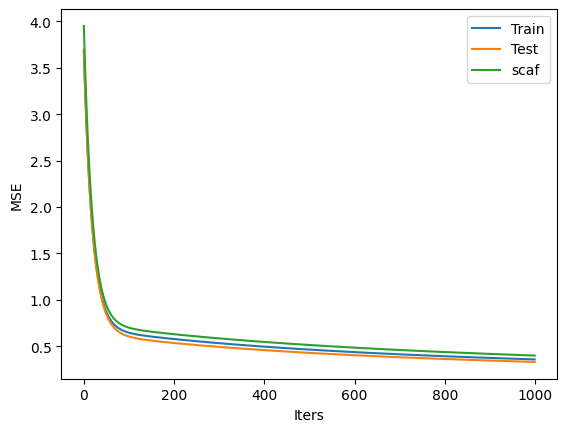

In [ ]:
weights_train = gradient_descent(X_train, y_train, X_test, y_test, X_test_scaf, y_test_scaf, weights_train, 0.001, 1000)


# print("h(x) ="+ str(round(weights[0,0], 2))+" + "+str(round(weights[1,0], 2))+"x1")

In [ ]:
y_train_pred = np.dot(X_train, weights_train)
y_test_pred = np.dot(X_test, weights_train)
y_test_scaf_pred = np.dot(X_test_scaf, weights_train)
# ВCalculating MSE for train and test
train_mse = get_loss(X_train, y_train.reshape(-1, 1), weights_train)
test_mse = get_loss(X_test, y_test.reshape(-1, 1), weights_train)
test_scaf_mse = get_loss(X_test_scaf, y_test_scaf.reshape(-1, 1), weights_train)
print("MSE для обучающей выборки:", train_mse)
print("MSE для тестовой выборки:", test_mse)
print("MSE для тестовой выборки (scaf):", test_scaf_mse)


MSE для обучающей выборки: 0.3587841445943714
MSE для тестовой выборки: 0.3318326921844321
MSE для тестовой выборки (scaf): 0.40039196337692684


In [ ]:
# def gradient_descent_2(X_test, y_test, weights_test, lr, max_iters):
#     m_test = len(y_test)

#     test_losses = []

#     for i in tqdm(range(max_iters)):
#         y_pred_test = X_test.dot(weights_test)
#         error = y_pred_test - y_test
#         gradient_test = 1.0 / m_test * np.dot(X_test.T, error)
#         weights_test -= lr * gradient_test

#         test_losses.append(get_loss(X_test, y_test, weights_test))

#     plt.plot(test_losses, label='Test')
#     plt.legend()
#     plt.xlabel('Iters')
#     plt.ylabel('MSE')
#     plt.show()
#     print('bfb', gradient_test)
#     print('fffff',error)

#     return  test_losses, weights_test
# print('yyyyy',weights_test)


In [ ]:
# test_losses, weights_test = gradient_descent_2(X_test, y_test, weights_test, 0.01, 1000)
# test_losses